In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from tensorflow.keras.utils import to_categorical
from sklearn .preprocessing import LabelBinarizer
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [29]:
data_path=r"C:\pyyy\procan"

In [2]:
# Uninstall the current version of TensorFlow.
!pip uninstall tensorflow -2.13.0

# Install TensorFlow 1.15.0.
!pip install tensorflow==2.12.0

# Verify the TensorFlow version.
import tensorflow as tf
print(tf.__version__)


Usage:   
  pip uninstall [options] <package> ...
  pip uninstall [options] -r <requirements file> ...

no such option: -2


  Using cached tensorflow-2.12.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
Using cached tensorflow-2.12.0-cp311-cp311-win_amd64.whl (1.9 kB)
2.12.0


In [30]:
categories=os.listdir(data_path)
categories

['test', 'train']

In [31]:
labels=[i for i in range(len(categories))]

In [32]:
label_dict=dict(zip(categories,labels))

In [33]:
data=[]
target=[]
for category in categories:
    path=os.path.join(data_path,category)
    images=os.listdir(path)
    for img in images:
        image_path=os.path.join(path,img)
        image=load_img(image_path,target_size=(174,122))
        image=img_to_array(image)
        image=preprocess_input(image)
        data.append(image)
        target.append(category)

In [34]:
lb=LabelBinarizer()
target=lb.fit_transform(target)
target=to_categorical(target)

In [35]:
from tensorflow.python.keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [36]:
np.save('data.npy', data) 

In [37]:
np.save('target.npy', target)

In [38]:
import numpy as np
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.python.keras.layers import Conv2D,MaxPooling2D
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.optimizers import TFOptimizer
from tensorflow.python.keras.models import load_model
data=np.load('data.npy')
target=np.load('target.npy')

In [39]:
from sklearn.model_selection import train_test_split
#data preperation
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [40]:
model=Sequential()

#create a convolutional layer
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))#Here 200 convolutional layer
model.add(Activation('relu'))#relu is the activation function
model.add(MaxPooling2D(pool_size=(2,2)))#2x2 maxpooling layer
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer followed by Relu and MaxPooling layers
model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 50 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

In [43]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(train_data,train_target,epochs=15,callbacks=[checkpoint],validation_split=0.2,validation_data=(test_data,test_target))

Epoch 1/15
213/213 [==============================] - 791s 4s/step - loss: 0.4289 - accuracy: 0.8324 - val_loss: 0.4790 - val_accuracy: 0.8204
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/15
213/213 [==============================] - 831s 4s/step - loss: 0.4107 - accuracy: 0.8388 - val_loss: 0.4573 - val_accuracy: 0.8169
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/15
213/213 [==============================] - 825s 4s/step - loss: 0.3947 - accuracy: 0.8409 - val_loss: 0.4482 - val_accuracy: 0.8234
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/15
213/213 [==============================] - 756s 4s/step - loss: 0.3672 - accuracy: 0.8479 - val_loss: 0.4720 - val_accuracy: 0.8122
Epoch 5/15
213/213 [==============================] - 756s 4s/step - loss: 0.3491 - accuracy: 0.8485 - val_loss: 0.4743 - val_accuracy: 0.8234
Epoch 6/15
213/213 [==============================] - 728s 3s/step - loss: 0.3173 - accuracy: 0.8614 - val_loss

In [ ]:
model.save('cervical_proj12_model.h5')

In [4]:
import numpy as np

In [ ]:
train_data = np.array(train_data)
train_target = np.array(train_target)

In [46]:
from tensorflow.python.distribute import input_lib
from tensorflow.python.distribute.input_lib import DistributedDatasetInterface

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [2]:
from tensorflow.keras.models import load_model

In [3]:
load_model('cervical_proj12_model.h5')

In [4]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('cervical_proj12_model.h5')


In [5]:
import numpy as np

In [ ]:
#loss, accuracy = model.evaluate(test_data,test_target)
#print('Test accuracy =', accuracy)

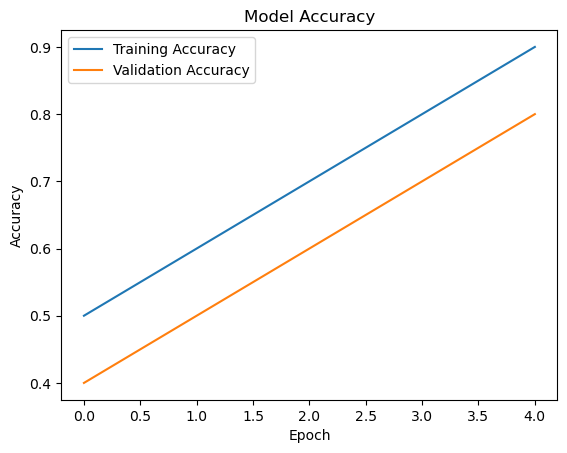

In [6]:
import matplotlib.pyplot as plt

# Assuming you have saved the training history during model training
# history = model.fit(...)

# If you don't have access to the training history, create a mock history
# Replace these with your actual training history if available
history = {'accuracy': [0.5, 0.6, 0.7, 0.8, 0.9],
           'val_accuracy': [0.4, 0.5, 0.6, 0.7, 0.8]}

# Plot the accuracy graph
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [11]:
import cv2
import numpy as np

# Assuming you have already loaded the model
# model = ...

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2.imshow('Input Image', input_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Resize the image to match the expected input shape of the model (174x122)
input_image_resized = cv2.resize(input_image, (174, 122))

# Scale the pixel values to [0, 1]
input_image_scaled = input_image_resized / 255

# Reshape the input image to match the model's input shape
input_image_reshaped = np.reshape(input_image_scaled, [1, 174, 122, 3])

# Make predictions
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

# Assuming it's a binary classification task
threshold = 0.8

# Extract the predicted probability
predicted_probability = input_prediction[0][1]

if predicted_probability >= threshold:
    print('Cancer cell not detected')
else:
    print('Cancer cells detected.')


Path of the image to be predicted: D:\python\project cancer\Cervical Cancer Balanced Data\test\type_1_2.jpg
1/1 [==============================] - 0s 43ms/step
[[0.20038942 0.79961056]]
Cancer cells detected.


In [ ]:
D:\python\project cancer\Cervical Cancer Balanced Data\test\type_1_2.jpg

In [ ]:
C:\Users\anto\Pictures\Camera Roll\WIN_20240410_11_36_52_Pro.jpg

In [ ]:
import tkinter as tk
from tkinter import filedialog, messagebox
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
model = load_model('cervical_proj12_model.h5')

def load_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        img = image.load_img(file_path, target_size=(174,122))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        return img, file_path
    else:
        return None, None

def predict_image(name, age):
    img, file_path = load_image()
    if img is None or file_path is None:
        return
    
    # Scale the pixel values to [0, 1]
    input_image_scaled = img / 255

    # Reshape the input image to match the model's input shape
    input_image_reshaped = np.reshape(input_image_scaled, [1, 174, 122, 3])

    # Make predictions
    input_prediction = model.predict(input_image_reshaped)

    # Assuming it's a binary classification task
    threshold = 0.8

    # Extract the predicted probability
    predicted_probability = input_prediction[0][1]

    if predicted_probability >= threshold:
        result_label.config(text=f'Patient: {name}\nAge: {age} \nCancer cell detected', fg='red')
    else:
        result_label.config(text=f'Patient: {name}\nAge: {age} \nCancer cells not detected.', fg='green')

def main():
    root = tk.Tk()
    root.title("Cervical Cancer Prediction")
    root.geometry("400x400")

    # Set black background
    background_color = "black"
    root.configure(background=background_color)

    name_label = tk.Label(root, text="Enter Name:", bg=background_color, fg="white")
    name_label.pack(pady=5)
    name_entry = tk.Entry(root)
    name_entry.pack(pady=5)

    age_label = tk.Label(root, text="Enter Age:", bg=background_color, fg="white")
    age_label.pack(pady=5)
    age_entry = tk.Entry(root)
    age_entry.pack(pady=5)

    load_button = tk.Button(root, text="Load Image", command=lambda: predict_image(name_entry.get(), age_entry.get()))
    load_button.pack(pady=10)

    global result_label
    result_label = tk.Label(root, text='', font=('Helvetica', 12), bg=background_color, fg="white")
    result_label.pack(pady=10)

    root.mainloop()

if __name__ == "__main__":
    main()


1/1 [==============================] - 0s 50ms/step
